In [1]:
import torchvision.datasets as dts
from torchvision.transforms import ToTensor

In [2]:
def divider():
    print("-----------------------------------")

train_set = dts.MNIST(
    root = 'data',  
    train = True,                         
    transform = ToTensor(),  # This transformation converts the images into PyTorch tensors
    download = True,          # download the data from the internet  
)
test_set = dts.MNIST(
    root = 'data', 
    train = False, 
    transform = ToTensor()
)
print("DONE")

DONE


In [3]:
print(f"Train Set: {train_set}")
divider()
print(f"Test Set: {test_set}")

Train Set: Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
-----------------------------------
Test Set: Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [4]:
import torch
import matplotlib.pyplot as plt

In [5]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=True)

In [12]:
x = iter(train_loader)
type(x)

torch.utils.data.dataloader._SingleProcessDataLoaderIter

In [7]:
print(f"Train Loader: {train_loader}")
divider()
print(f"Test Loader: {test_loader}")

Train Loader: <torch.utils.data.dataloader.DataLoader object at 0x000001B049EA15D0>
-----------------------------------
Test Loader: <torch.utils.data.dataloader.DataLoader object at 0x000001B049EB6D90>


In [14]:
data_iterator = iter(train_loader) # Create an iterator for the train_loader
images, labels = next(data_iterator) # Get a batch of images and labels
print(f"Images: {images}")
divider()
print(f"Labels: {labels}")
divider()

print(f"Images shape: {images.shape}") # Print the shape of the images and labels
print(f"Labels shape: {labels.shape}")
type(images)

Images: tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0., 

torch.Tensor

(28, 28)

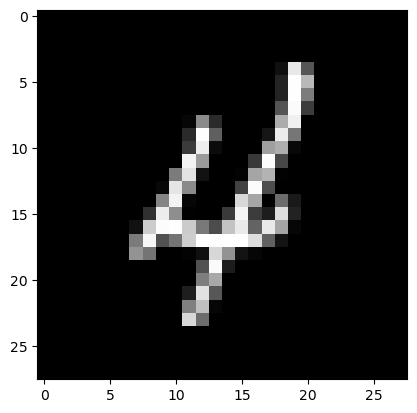

In [19]:
import random
img = random.choice(images).numpy().squeeze()
plt.imshow(img, cmap='gray');
img.shape

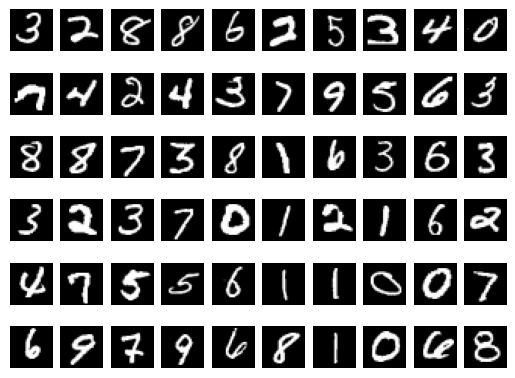

In [10]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray')

# Machine Learning
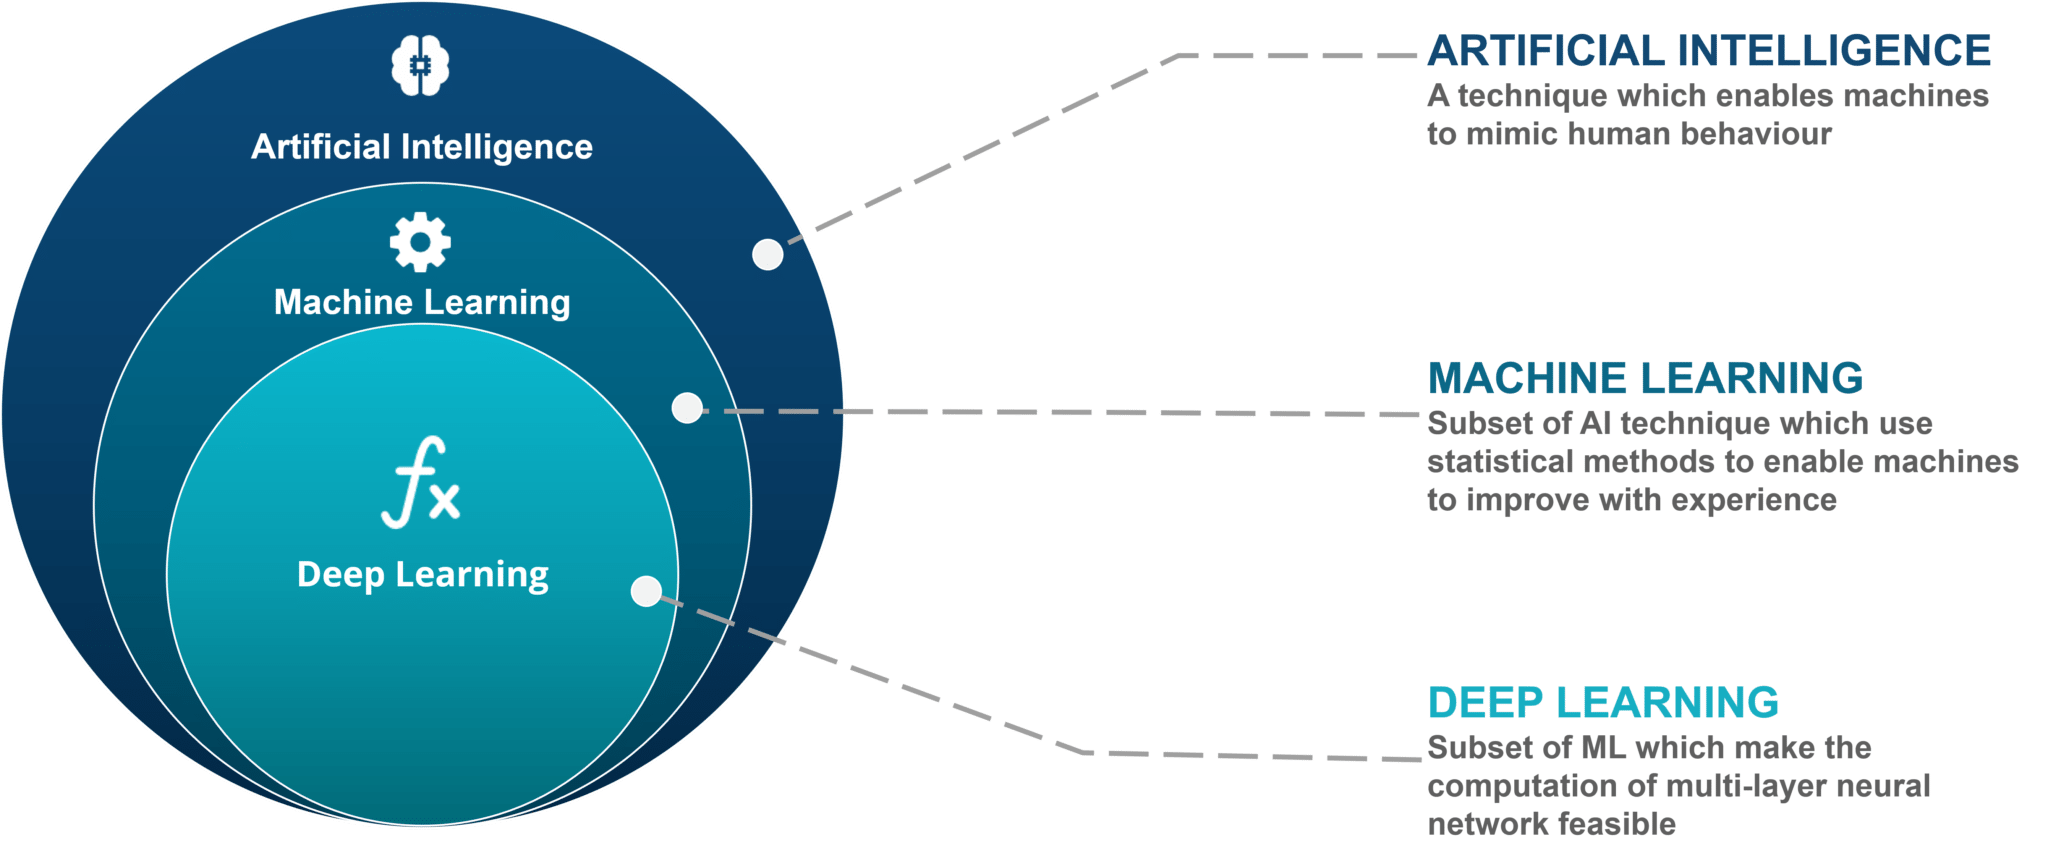

### There are types of ML, here we'll discuss them -> [Here](https://www.overleaf.com/read/wrzhqvkgkzqp)

# Prerequisites
## Tensors
Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

In [11]:
import torch

### Initialize a Tensor

In [12]:
shape = (2, 3)
tensor = torch.rand(shape) 
print(f"Tensor: {tensor}")

Tensor: tensor([[0.4839, 0.8747, 0.8636],
        [0.2599, 0.4337, 0.1547]])


In [13]:
data = [
    [2, 3],
    [3, 4],
]

### Initialize a Tensor from array

In [14]:
tensor_data = torch.tensor(data)
print(f"Tensor: {tensor_data}")
print(f"Type: {type(tensor_data)}")

Tensor: tensor([[2, 3],
        [3, 4]])
Type: <class 'torch.Tensor'>


In [15]:
import numpy as np
data = np.array([1, 2, 3])

tensor_numpy = torch.from_numpy(data)
print(f"Numpy Tensor: {tensor_numpy}")

Numpy Tensor: tensor([1, 2, 3], dtype=torch.int32)


### Tensor Attributes

In [16]:
print(f"Shape: {tensor_data.shape}")
print(f"Data Type: {tensor_data.dtype}")
print(f"Device: {tensor_data.device}")

Shape: torch.Size([2, 2])
Data Type: torch.int64
Device: cpu


In [17]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {device}")

Device: cpu


# Steps on making a model
1. Getting the data right
2. Building (or choosing) a model
3. Fitting the model (Training)


4. Making predictions (Inference)
5. Saving and loading the model
6. Putting all together

## <font color="green">Linear Regression Workshop</font>


In [18]:
# Creating known parameters (Y = 0.7 * X + 0.3)
weight = 0.7 # slope
bias = 0.3 # intercept

# Creating data
start = 0
end = 10
step = 0.2

X = torch.arange(start, end, step)
y = weight * X + bias

print(f"X: {X[:10]}")
print(f"y: {y[:10]}")

X: tensor([0.0000, 0.2000, 0.4000, 0.6000, 0.8000, 1.0000, 1.2000, 1.4000, 1.6000,
        1.8000])
y: tensor([0.3000, 0.4400, 0.5800, 0.7200, 0.8600, 1.0000, 1.1400, 1.2800, 1.4200,
        1.5600])


In [19]:
# Create train and test sets
splitter = int(0.8 * len(X))
X_train, y_train = X[:splitter], y[:splitter]
X_test, y_test = X[splitter:], y[splitter:]

print(f"Train Length: {len(X_train)}")
print(f"Test Length: {len(X_test)}")

Train Length: 40
Test Length: 10


In [20]:
def plot_predictions(train_data: torch.Tensor,
                    train_labels: torch.Tensor,
                    test_data: torch.Tensor,
                    test_labels: torch.Tensor,
                    predictions: torch.Tensor = None):
    plt.figure(figsize=(5, 4))

    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
        
    plt.legend(prop={"size": 14})

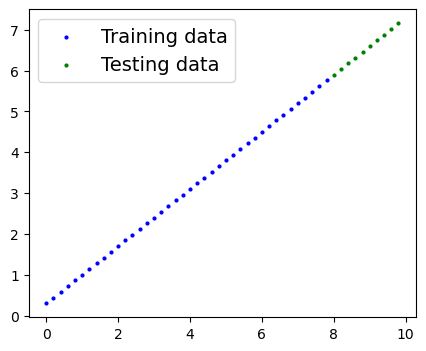

In [21]:
plot_predictions(train_data= X_train, train_labels= y_train, test_data= X_test, test_labels= y_test)

In [22]:
# Build Model
import torch
import torch.nn as nn
class LinearRegressionModel(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
            requires_grad=True, # <- can we update this value with gradient descent?
            dtype=torch.float # <- PyTorch loves float32 by default
        ))
        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
            requires_grad=True, # <- can we update this value with gradient descent?
            dtype=torch.float # <- PyTorch loves float32 by default
        ))
    def forward(self, x: torch.Tensor):
        y = x * self.weights + self.bias #  as the formula (y = x * w + b)
        return y

In [23]:
model_0 = LinearRegressionModel()
print(f"Model_0 Parameters: {list(model_0.parameters())}")
divider()
print(f"Named Parameters: {model_0.state_dict()}")


Model_0 Parameters: [Parameter containing:
tensor([-0.4098], requires_grad=True), Parameter containing:
tensor([1.1828], requires_grad=True)]
-----------------------------------
Named Parameters: OrderedDict([('weights', tensor([-0.4098])), ('bias', tensor([1.1828]))])


In [24]:


# 1 - torch.inference_mode() is a PyTorch context manager that temporarily sets the model into an inference mode.
#     In inference mode, certain operations that are only relevant during training are disabled or optimized for inference. For example, dropout and batch normalization layers behave differently in training and inference modes.
#     When you're done with inference and want to switch back to training mode, you can exit this context, and the model's mode will return to its original state (training or evaluation mode).
#      hy Use Inference Mode:

# 2- During inference, you typically don't want the model to perform any training-related operations such as updating gradients, computing gradients, or tracking intermediate values. Instead, you want the model to produce predictions efficiently.
#    By using torch.inference_mode(), you ensure that the model's behavior during this particular block of code is optimized for inference, and any training-related operations are disabled.


# Predict
with torch.inference_mode(): 
    y_preds = model_0(X_test)

print(f"Predicted value: {y_preds}")

Predicted value: tensor([-2.0957, -2.1777, -2.2596, -2.3416, -2.4235, -2.5055, -2.5875, -2.6694,
        -2.7514, -2.8334])


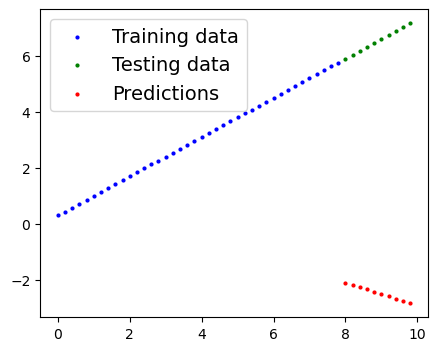

In [25]:
plot_predictions(X_train, y_train, X_test, y_test, y_preds)

In [26]:
print(f"Difference between labeled data and predictions {y_test - y_preds}")

Difference between labeled data and predictions tensor([7.9957, 8.2177, 8.4396, 8.6616, 8.8835, 9.1055, 9.3275, 9.5494, 9.7714,
        9.9934])


## Loss Function
Measures how wrong your models predictions (e.g. y_preds) are compared to the truth labels (e.g. y_test). Lower the better.

In [27]:
print(f"Loss in one parameter: {y_preds[0] - y_test[0]}")

Loss in one parameter: -7.995696544647217


In [28]:
loss_function = nn.L1Loss() # Mean Absolute Error

## Optimizer
Tells your model how to update its internal parameters to best lower the loss.

In [29]:
optimizer = torch.optim.SGD(model_0.parameters(), # model parameters to optimize
                              lr=0.001, # learning rate (how fast the model learns)
                            )

In [30]:
def train(
        model: nn.Module, # The neural network model to be trained.
        train_data: torch.Tensor,
        train_labels: torch.Tensor,
        test_data: torch.Tensor,
        test_labels: torch.Tensor,
        loss_function: nn.Module,
        optimizer: torch.optim.Optimizer,
        epochs: int, # The number of training epochs (iterations over the entire training dataset).
    ):
    epochs_count ,train_loss_arr, test_loss_arr = [], [], [] # Three lists are initialized to keep track of the training progress over epochs
    for epoch in range(epochs+1):
        model.train() 
        y_pred = model(train_data)
        loss = loss_function(y_pred, train_labels)
        loss.backward() # Gradients are calculated using loss.backward() to prepare for parameter updates.

        optimizer.step() # it is used to update the model's parameters based on the computed gradients
        optimizer.zero_grad() # Gradients are cleared with optimizer.zero_grad() to prevent accumulation.

        model.eval() # After the model is trained for an epoch, it is set to evaluation mode (model.eval()).
        with torch.inference_mode(): # it is ensuring that no training-related operations (like dropout) are active
            y_pred = model(test_data)
            test_loss = loss_function(y_pred, test_labels)

        if epoch % 10 == 0:
            epochs_count.append(epoch)
            train_loss_arr.append(loss.detach().numpy())
            test_loss_arr.append(test_loss.detach().numpy())
            print(f"Epoch {epoch}: MAE Loss: {loss.item():0.2f} | Test Loss: {test_loss.item():0.2f}")
    return epochs_count, train_loss_arr, test_loss_arr


In [31]:
epochs_count, train_loss, test_loss = train(
                                        model_0, 
                                        train_data=X_train, 
                                        train_labels=y_train, 
                                        test_data=X_test, 
                                        test_labels=y_test, 
                                        loss_function=loss_function, 
                                        optimizer=optimizer, 
                                        epochs=1000
                                    )

Epoch 0: MAE Loss: 3.56 | Test Loss: 8.96
Epoch 10: MAE Loss: 3.40 | Test Loss: 8.61
Epoch 20: MAE Loss: 3.25 | Test Loss: 8.27
Epoch 30: MAE Loss: 3.10 | Test Loss: 7.92
Epoch 40: MAE Loss: 2.95 | Test Loss: 7.58
Epoch 50: MAE Loss: 2.80 | Test Loss: 7.23
Epoch 60: MAE Loss: 2.66 | Test Loss: 6.89
Epoch 70: MAE Loss: 2.51 | Test Loss: 6.55
Epoch 80: MAE Loss: 2.37 | Test Loss: 6.21
Epoch 90: MAE Loss: 2.22 | Test Loss: 5.87
Epoch 100: MAE Loss: 2.08 | Test Loss: 5.54
Epoch 110: MAE Loss: 1.94 | Test Loss: 5.20
Epoch 120: MAE Loss: 1.81 | Test Loss: 4.87
Epoch 130: MAE Loss: 1.67 | Test Loss: 4.54
Epoch 140: MAE Loss: 1.54 | Test Loss: 4.22
Epoch 150: MAE Loss: 1.41 | Test Loss: 3.90
Epoch 160: MAE Loss: 1.29 | Test Loss: 3.59
Epoch 170: MAE Loss: 1.17 | Test Loss: 3.28
Epoch 180: MAE Loss: 1.06 | Test Loss: 2.98
Epoch 190: MAE Loss: 0.95 | Test Loss: 2.69
Epoch 200: MAE Loss: 0.85 | Test Loss: 2.41
Epoch 210: MAE Loss: 0.76 | Test Loss: 2.14
Epoch 220: MAE Loss: 0.69 | Test Loss: 1.89

In [32]:
def plot_stats(
        epochs: list,
        train_loss: list,
        test_loss: list,
    ):
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_loss, label='Train loss')
    plt.plot(epochs, test_loss, label='Test loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

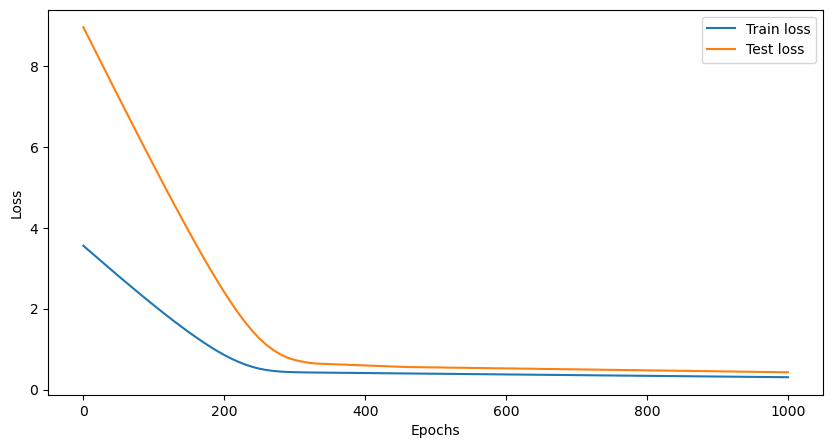

In [33]:
plot_stats(epochs_count, train_loss, test_loss)

In [34]:
def predict(model, X):
    with torch.inference_mode():
        y_pred = model(X)
        return y_pred

In [35]:
y_preds = predict(model_0, X_test)

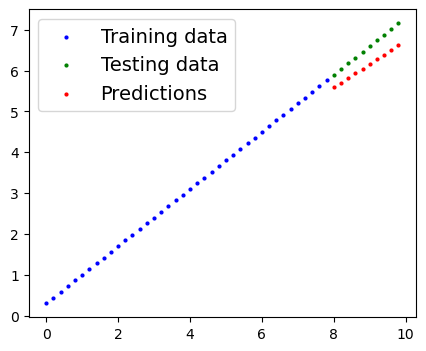

In [36]:
plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=y_preds,
)

In [37]:
print(f"Model Parameters: {model_0.state_dict()}")

Model Parameters: OrderedDict([('weights', tensor([0.5709])), ('bias', tensor([1.0226]))])


In [38]:
# Save model
from pathlib import Path

# Create a folder to save our models
model_path = Path('models')
model_path.mkdir(parents=True, exist_ok=True)

# Save the model
model_name = 'model_0.pth'
model_save_path = model_path / model_name

print(f"Saving model to: {model_save_path}")
torch.save(model_0.state_dict(), model_save_path)

Saving model to: models\model_0.pth


# Terminologies & Recap
1. **Feature**: A feature is an individual measurable property of a phenomenon being observed.
2. **Hyperparameter**: A parameter whose value is set before the learning process begins. It determines how the model is trained. It is not affected by the training process.
3. **Loss Function**: A function that tells us how good our model is. It measures the difference between the predicted value and the actual value.
4. **Optimizer**: A function that tries to minimize the loss function. It does so by adjusting the weights of the model.
5. **Learning Rate**: The amount by which the weights are adjusted during training. It is a hyperparameter that determines how fast the model is trained. A high learning rate means that the model is trained faster but it may not be accurate. A low learning rate means that the model is trained slower but it is more accurate.
6. **Epochs**: The number of times the model is trained on the entire dataset.
7. **Train and Test Dataset**: The dataset that is used to train the model is called the train dataset and the dataset that is used to test the model is called the test dataset.


4. **How to Make ML/DL**:
   1. **Data Preparation**: Preparing the data for the model.
   2. **Model Preparation**: Preparing the model for the data.
   3. **Model Training**: Training the model on the data.
   4. **Model Evaluation**: Evaluating the model on the test data.
   5. **Prediction**: Making predictions using the model.


   6. **Saving and Loading Model**: Saving the model for future use.
